In [30]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt


reading the photo

In [31]:
def read_photo(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

#specifying the photo

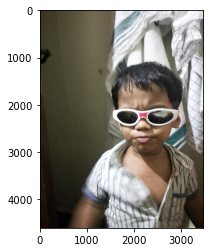

In [32]:
path = "kunjani1.jpg"
img = read_photo(path)
o_img = np.copy(img)

create edge mask

In [33]:
def edge_mask(img, line_size, blur_value):
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    gray_blur  = cv.medianBlur(gray, blur_value)

    edges = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, line_size, blur_value)
    return edges

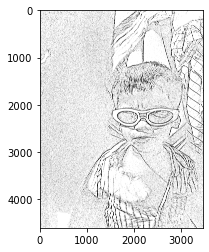

In [34]:
line_size, blur_value = 15,3
new_img = edge_mask(img, line_size, blur_value)
plt.imshow(new_img, cmap='gray')
plt.show()


Reduce the colour pallet

In [35]:
def color_quantization(img, k): 
    # Transform the image
    from cv2 import TERM_CRITERIA_MAX_ITER


    data = np.float32(img).reshape((-1,3))

    #determine the image

    criteria = (cv.TERM_CRITERIA_EPS + TERM_CRITERIA_MAX_ITER, 20, 0.001)

    #implementing K-means

    ret, label, center = cv.kmeans(data, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

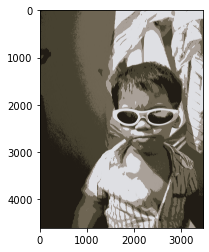

In [36]:
img_q  = color_quantization(img, 5)
plt.imshow(img_q)
plt.show()


# Reduce the noise

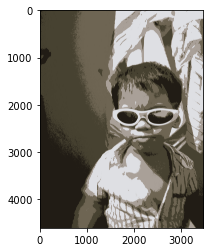

In [37]:
blurred = cv.bilateralFilter(img_q, d = 5, sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

# Combine edge_mask with quantise color

In [38]:
def cartoon():
    c = cv.bitwise_and(blurred, blurred, mask = new_img)

    plt.imshow(c)
    plt.title("C_img")
    plt.show()
    
    
    plt.imshow(o_img)
    plt.title('O_img')
    plt.show()
    return c
    

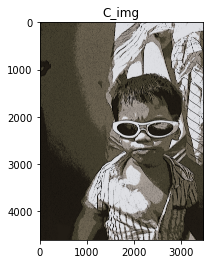

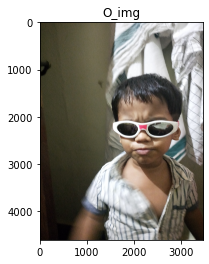

True

In [39]:
last_img = cartoon()
cv.imwrite("c_marwan3_img.jpg", last_img)
